In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

### Loading and Preprocessing

In [34]:

df= pd.read_csv("../datasets/spam_or_ham.csv", encoding="latin1", usecols=[0,1], names=['label', 'message'])
# Remove any rows where 'label' or 'message' might be NaN

df = df.dropna(subset=['label','message'])
df['label'] = df['label'].map({'spam':0, 'ham':1})

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)
# Vectorize the text messages using CountVectorizer, count vectorizer transforms text into a matrix of token counts.
vectorizer = CountVectorizer()
x_train_vec= vectorizer.fit_transform(X_train)
x_test_vec= vectorizer.transform(X_test)

### Model Building

In [36]:
log_regression = LogisticRegression()
log_regression.fit(x_train_vec, Y_train)
y_predict = log_regression.predict(x_test_vec)
# predicting probabilities of each instance belonging to a class
y_pred_probs = log_regression.predict_proba(x_test_vec)[:,1]

### Evaluation

In [37]:
cnf= confusion_matrix(Y_test, y_predict)
print(cnf)

[[127  23]
 [  0 965]]


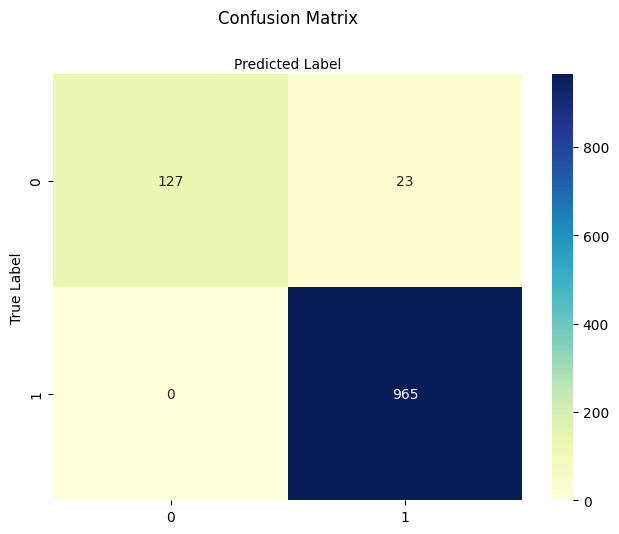

In [38]:
import numpy as np
import seaborn as sns
class_names = ['Spam', 'Ham']

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf), annot=True, cmap="YlGnBu", fmt='g')

ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

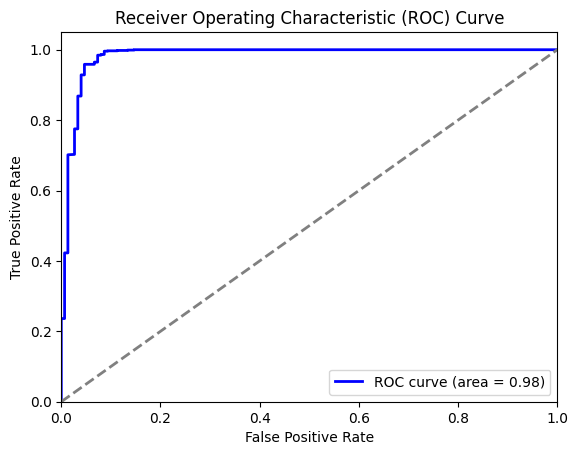

In [39]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_probs)
roc_auc = roc_auc_score(Y_test, y_pred_probs)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [40]:

#accuracy scores
precision = precision_score(Y_test, y_predict)
roc_auc = roc_auc_score(Y_test, y_pred_probs)
print("precision: ", precision)
print("ROC-AUC score: ", roc_auc)

precision:  0.9767206477732794
ROC-AUC score:  0.982832469775475
